In [6]:
%matplotlib inline
import numpy as np
import sys, scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

sys.path.append('../src')
import laplacian, gradient, plotGraph, librosaF
import RecurrenceMatrix as RM

# Load signal, true boundary, original sigma, learned sigmas

1. signal has been cqt, beat syc
2. true boundary imported from SALAMI, been time2frame conversion, been frame2frame2 conversion
3. sigma is learned by minimize || L_true - L ||_2

In [12]:
cqt_med = np.load("./tempArray/cqt_med.npy")

np.random.seed(123)
sigmas0 = np.random.rand(cqt_med.shape[0], cqt_med.shape[0]) + 1e-7 #add a base in case of 0 sigma
sigmas0 = ((sigmas0 + sigmas0.T)/2)

sigmas = np.load("./sigmas/UpdateTest_num_singleII_Alpha100000/UpdateTest_num_singleII_Alpha100000_step5.npy")
m_true = np.load("./tempArray/m_true.npy")

gm0 = RM.feature2GaussianMatrix(cqt_med, sigmas0) #(nSample, nFeature)
gm = RM.feature2GaussianMatrix(cqt_med, sigmas) #(nSample, nFeature)

# Recurrent matrix before and after learned sigma 

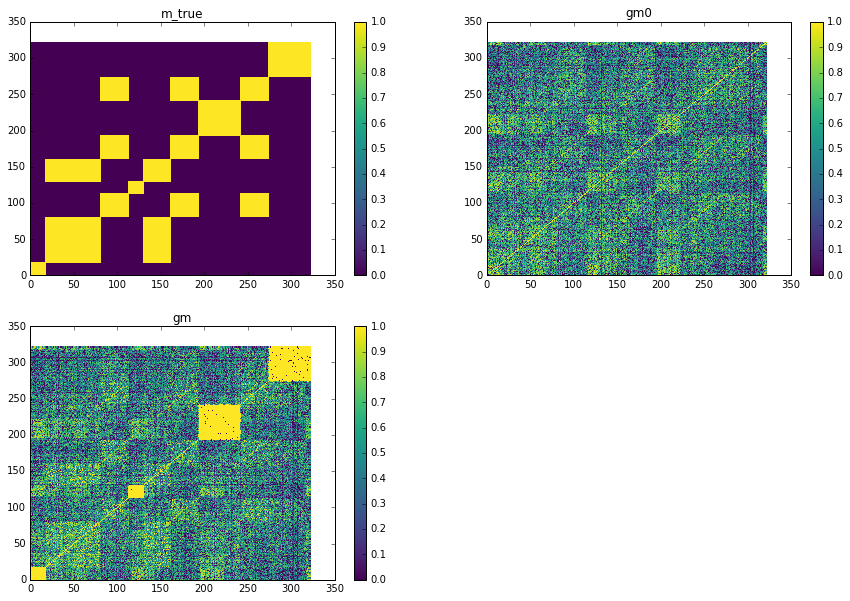

In [13]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.pcolor(m_true, cmap="viridis")
plt.colorbar()
plt.title("m_true")

plt.subplot(2, 2, 2)
plt.pcolor(gm0, cmap="viridis")
plt.colorbar()
plt.title("gm0")

plt.subplot(2, 2, 3)
plt.pcolor(gm, cmap="viridis")
plt.colorbar()
plt.title("gm")

plt.show()

In [14]:
#Get Laplacian matrix and get top10 eigen vectors
Y_true = laplacian.getNormLaplacian(m_true, 10)
Y = laplacian.getNormLaplacian(gm, 10)

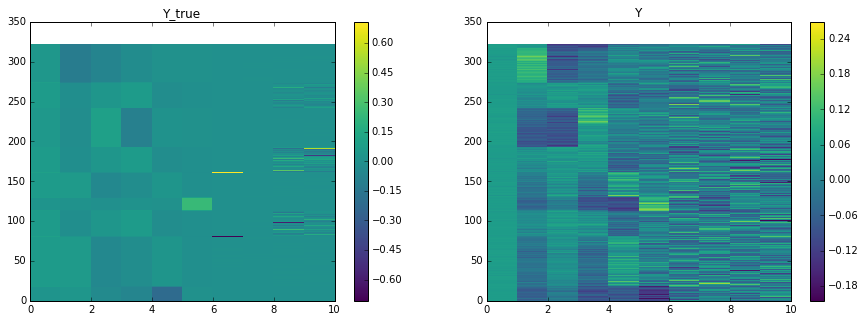

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pcolor(Y_true, cmap="viridis")
plt.colorbar()
plt.title("Y_true")

plt.subplot(1, 2, 2)
plt.pcolor(Y, cmap="viridis")
plt.colorbar()
plt.title("Y")

plt.show()

# Perform boundary detection on learned recurrence matrix

In [18]:
def boundaryDetection(Y, nCluster):
    row_leng = np.linalg.norm(Y, axis=1) #get length of each row
    row_leng[row_leng==0] = 1 #replace the legth of 0 to 1
    Y_norm = Y / row_leng[:, np.newaxis]

    clf = KMeans(n_clusters=nCluster, max_iter=1000).fit(Y_norm)
    centroids, labels = clf.cluster_centers_, clf.labels_

    boundary = []
    for idx in xrange(len(labels)-1):
        if labels[idx] != labels[idx+1]:
            boundary += [idx]
    
    return boundary, centroids

nCluster = 2
b_true, c_true = boundaryDetection(Y_true, nCluster)
b, c = boundaryDetection(Y_true, nCluster)

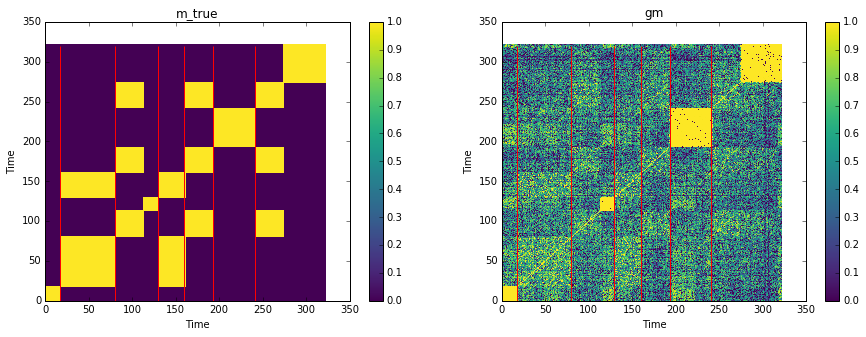

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pcolor(m_true, cmap="viridis")
plt.colorbar()
plt.vlines(b_true, 0, 320, color='r')
plt.title('m_true')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(1, 2, 2)
plt.pcolor(gm, cmap="viridis")
plt.colorbar()
plt.vlines(b, 0, 320, color='r')
plt.title('gm')
plt.xlabel('Time')
plt.ylabel('Time')

plt.show()